In [20]:
import numpy as np
import matplotlib.pyplot as plt
import audacity

import FluteTransients as ftr

%matplotlib notebook

In [21]:
# Listing relevant datafiles
acquisitions = [0, 1, 2]
runnames = np.arange(300, 675, 25)
RUNS = 15
CHANNEL_CONFIG = (1, 3, 0, 2)

dfiles = []
for acq in acquisitions:
    dfiles.append([])
    for r, rn in enumerate(runnames):
        acqfiles = "DATA/MAIN_4500rpm/freqchange/trill/%d_%d.aup" % (rn, acq)
        dfiles[acq].append(acqfiles)

In [22]:
IRdata = []
for acqno, acqfiles in enumerate(dfiles):
    IRdata.append([])
    for file in acqfiles:
        filedata = ftr.get_tfdata(file, *CHANNEL_CONFIG, nfft=1024*2)
        IRdata[acqno].append(filedata['ir'])

DATA/MAIN_4500rpm/freqchange/trill/300_0.aup
DATA/MAIN_4500rpm/freqchange/trill/325_0.aup
DATA/MAIN_4500rpm/freqchange/trill/350_0.aup
DATA/MAIN_4500rpm/freqchange/trill/375_0.aup
DATA/MAIN_4500rpm/freqchange/trill/400_0.aup
DATA/MAIN_4500rpm/freqchange/trill/425_0.aup
DATA/MAIN_4500rpm/freqchange/trill/450_0.aup
DATA/MAIN_4500rpm/freqchange/trill/475_0.aup
DATA/MAIN_4500rpm/freqchange/trill/500_0.aup
DATA/MAIN_4500rpm/freqchange/trill/525_0.aup
DATA/MAIN_4500rpm/freqchange/trill/550_0.aup
DATA/MAIN_4500rpm/freqchange/trill/575_0.aup
DATA/MAIN_4500rpm/freqchange/trill/600_0.aup
DATA/MAIN_4500rpm/freqchange/trill/625_0.aup
DATA/MAIN_4500rpm/freqchange/trill/650_0.aup
DATA/MAIN_4500rpm/freqchange/trill/300_1.aup
DATA/MAIN_4500rpm/freqchange/trill/325_1.aup
DATA/MAIN_4500rpm/freqchange/trill/350_1.aup
DATA/MAIN_4500rpm/freqchange/trill/375_1.aup
DATA/MAIN_4500rpm/freqchange/trill/400_1.aup
DATA/MAIN_4500rpm/freqchange/trill/425_1.aup
DATA/MAIN_4500rpm/freqchange/trill/450_1.aup
DATA/MAIN_

In [32]:
meanIR = np.mean(IRdata, axis=0)
stdevsIR = ftr.get_stdevs(IRdata, meanIR)

(ar,br, cr) = np.polyfit(meanIR, np.arange(RUNS), 2)
yr = np.polyval([ar,br,cr], meanIR)
# err = np.sqrt(sum((yr-np.arange(RUNS))**2)/RUNS)

<IPython.core.display.Javascript object>


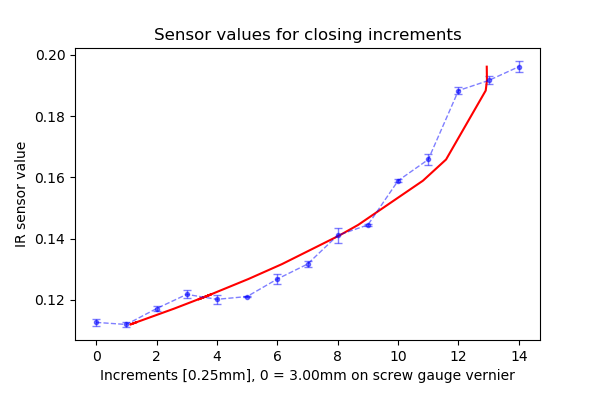

In [33]:
plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(RUNS), meanIR, yerr=stdevsIR,
            ls='--', lw=1, marker='.', capsize=3, alpha=0.5, color='b', ecolor='b')
plt.plot(yr, meanIR, c='r', 
         label='linear fit \n(slope = %.2f \nintercept = %.2f)' %(ar,br))
plt.title('Sensor values for closing increments')
plt.xlabel('Increments [0.25mm], 0 = 3.00mm on screw gauge vernier')
plt.ylabel('IR sensor value')
plt.subplots_adjust(bottom=0.15)